In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
data = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [4]:
data.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


handle missing values

In [9]:
# Handling missing values in the 'director' column by filling with 'Unknown'
data['director'].fillna('Unknown', inplace=True)

# Handling missing values in the 'cast' column by filling with 'Unknown'
data['cast'].fillna('Unknown', inplace=True)

# Handling missing values in the 'country' column by filling with 'Unknown'
data['country'].fillna('Unknown', inplace=True)

# Handling missing values in the 'date_added' column by dropping the rows with missing values
data.dropna(subset=['date_added'], inplace=True)

# Handling missing values in the 'rating' column by filling with the mode (most frequent value)
mode_rating = data['rating'].mode()[0]
data['rating'].fillna(mode_rating, inplace=True)

# Handling missing values in the 'duration' column by filling with 'Unknown'
data['duration'].fillna('Unknown', inplace=True)

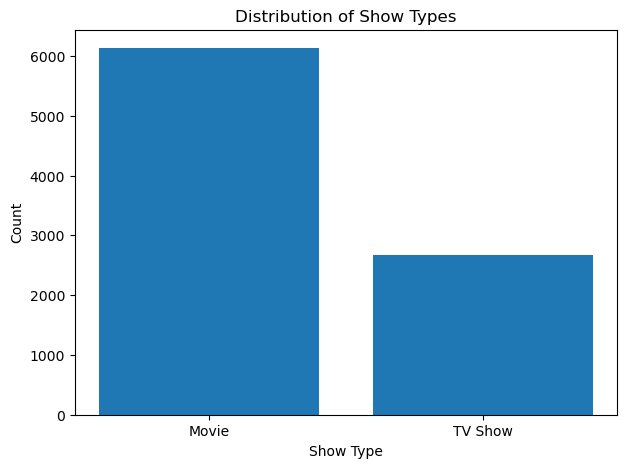

In [10]:
# Count the number of movies and TV shows
show_type_counts = data['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(7, 5))
plt.bar(show_type_counts.index, show_type_counts.values)
plt.xlabel('Show Type')
plt.ylabel('Count')
plt.title('Distribution of Show Types')
plt.show()

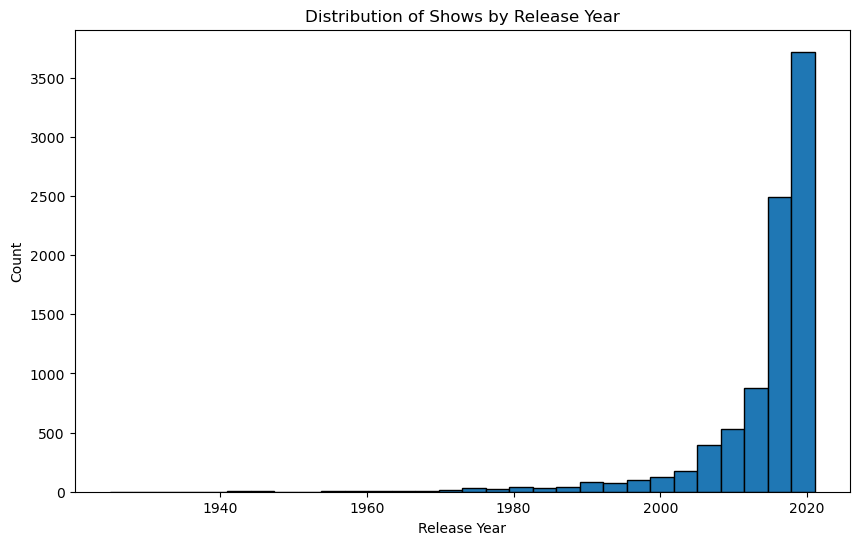

In [11]:
# Create a histogram of release years
plt.figure(figsize=(10, 6))
plt.hist(data['release_year'], bins=30, edgecolor='k')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Shows by Release Year')
plt.show()

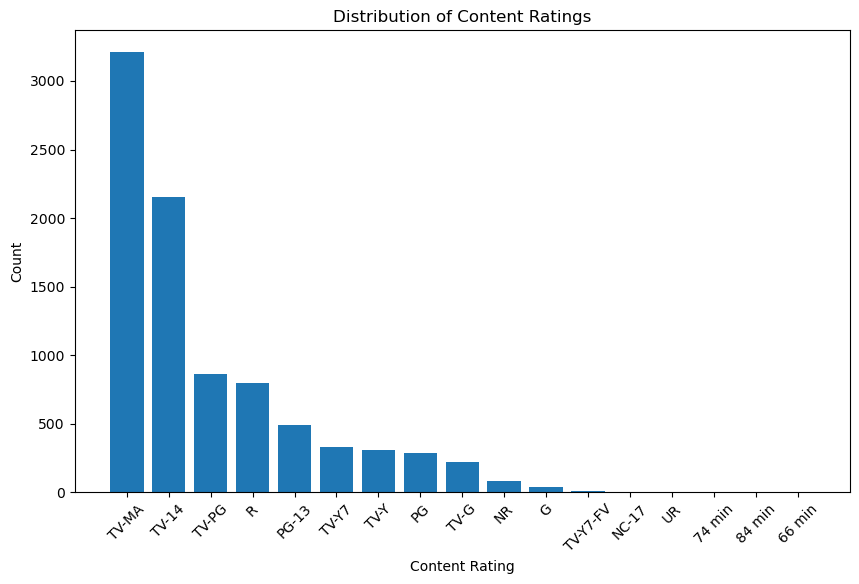

In [12]:
# Count the number of shows for each rating
rating_counts = data['rating'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.show()

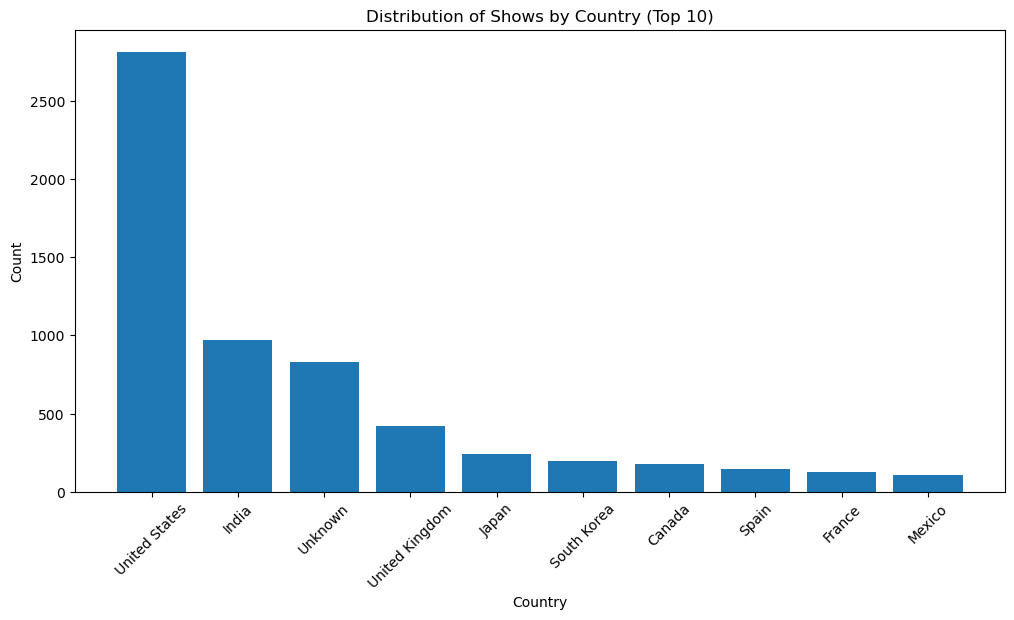

In [13]:
# Count the number of shows for each country
country_counts = data['country'].value_counts().head(10)  # Selecting top 10 countries

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Shows by Country (Top 10)')
plt.xticks(rotation=45)
plt.show()

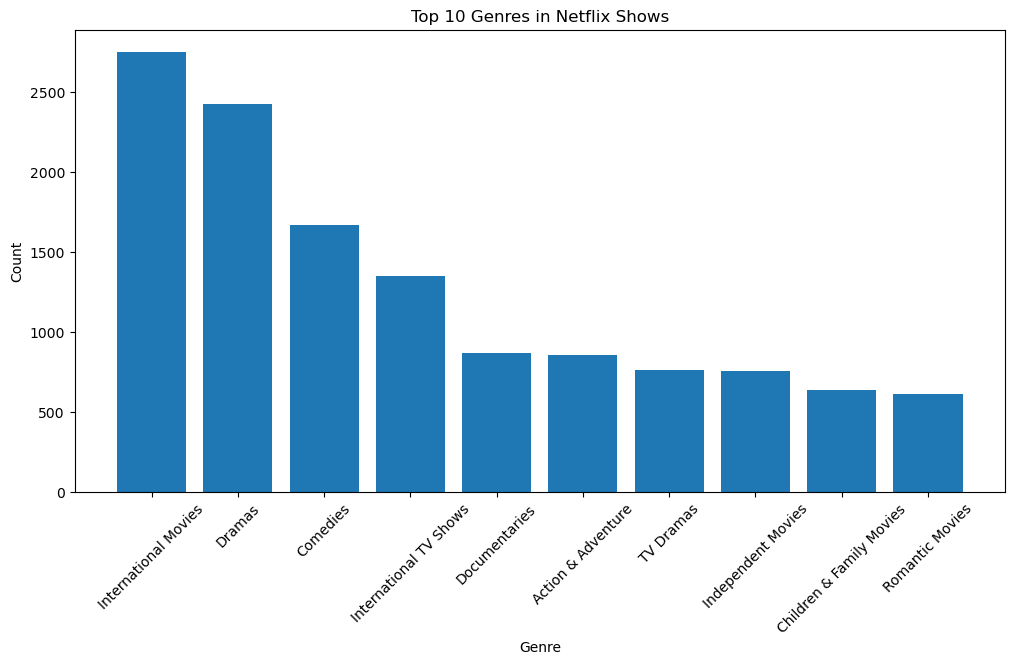

In [14]:
# Count the frequency of each genre
genre_counts = data['listed_in'].str.split(', ').explode().value_counts().head(10)  # Selecting top 10 genres

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Genres in Netflix Shows')
plt.xticks(rotation=45)
plt.show()

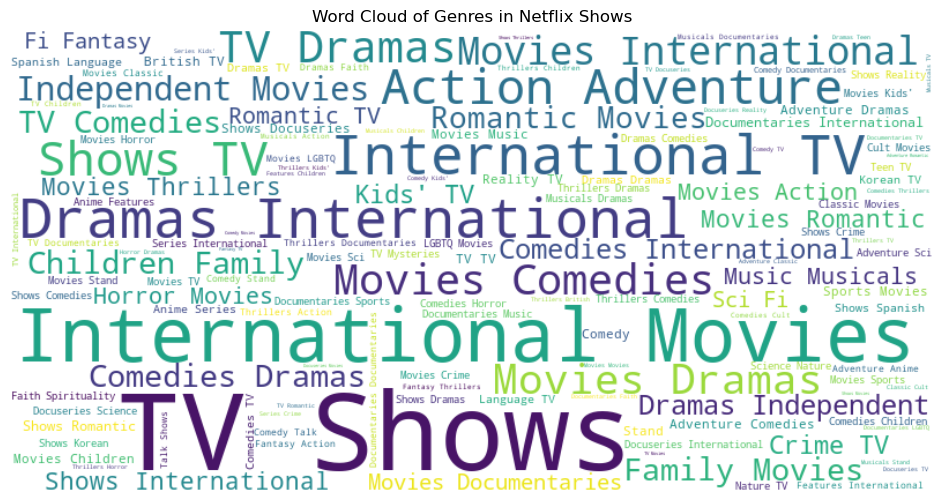

In [15]:
# Concatenate all genres into a single string
all_genres = ' '.join(data['listed_in'].str.replace(', ', ' '))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres in Netflix Shows')
plt.show()

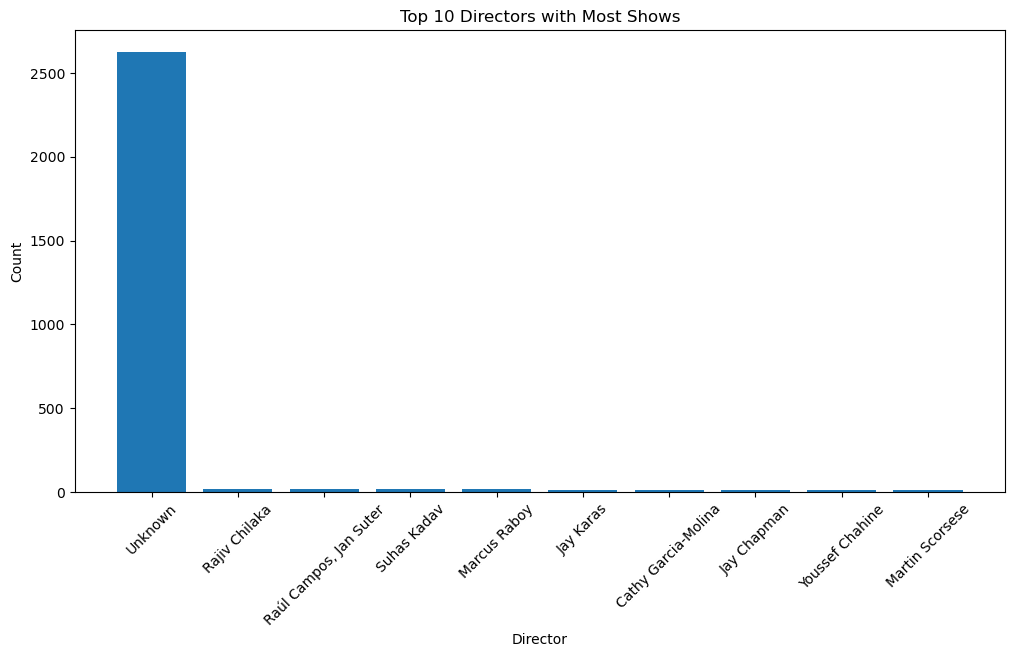

In [16]:
# Count the number of shows for each director
director_counts = data['director'].value_counts().head(10)  # Selecting top 10 directors

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(director_counts.index, director_counts.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors with Most Shows')
plt.xticks(rotation=45)
plt.show()

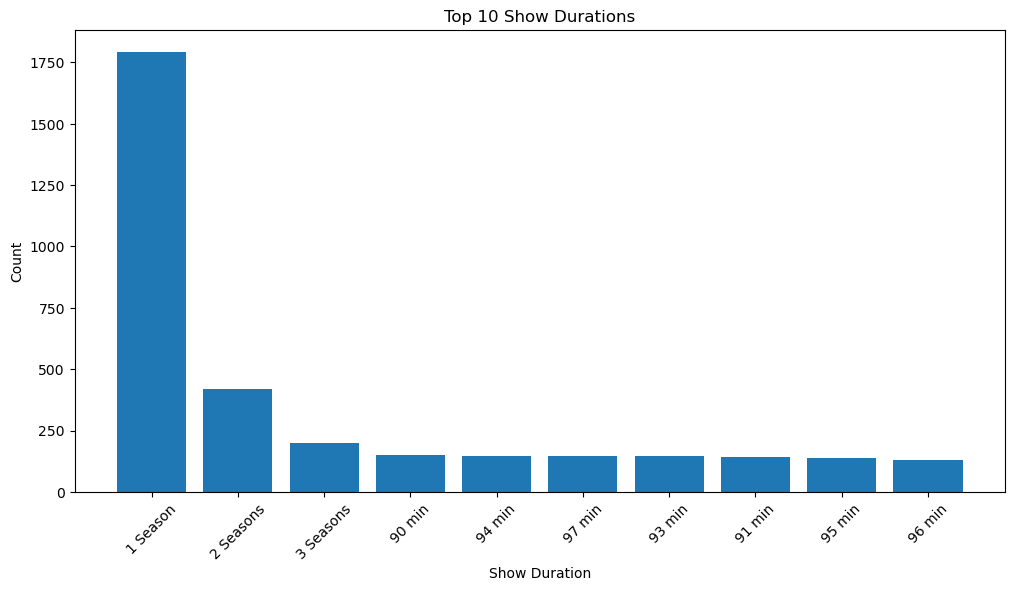

In [17]:
# Count the frequency of each show duration
duration_counts = data['duration'].value_counts().head(10)  # Selecting top 10 durations

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(duration_counts.index, duration_counts.values)
plt.xlabel('Show Duration')
plt.ylabel('Count')
plt.title('Top 10 Show Durations')
plt.xticks(rotation=45)
plt.show()

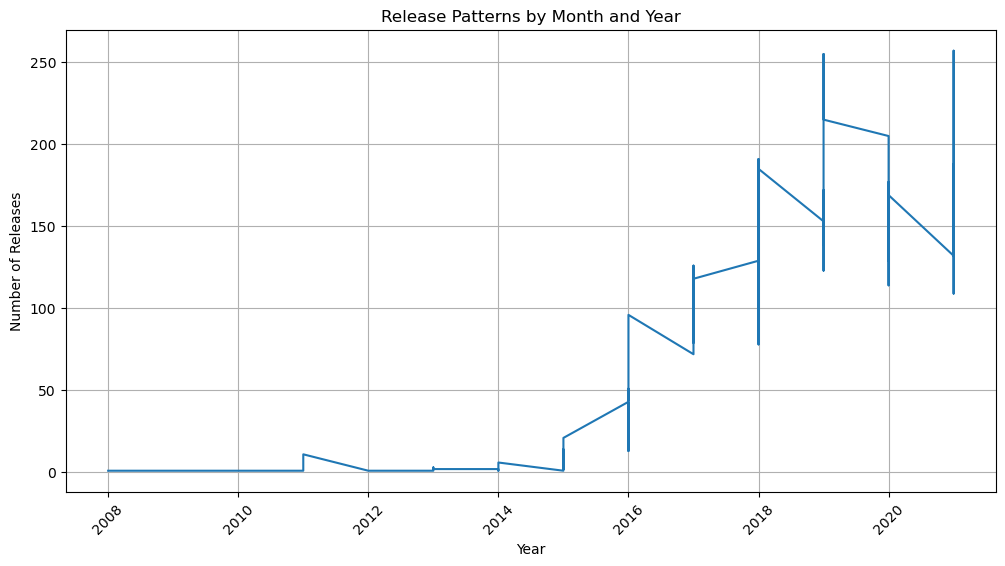

In [18]:
# Convert the "date_added" column to datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract the month and year from the "date_added" column
data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year

# Group the data by month and year and count the number of releases
monthly_counts = data.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['year_added'], monthly_counts['count'])
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Release Patterns by Month and Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

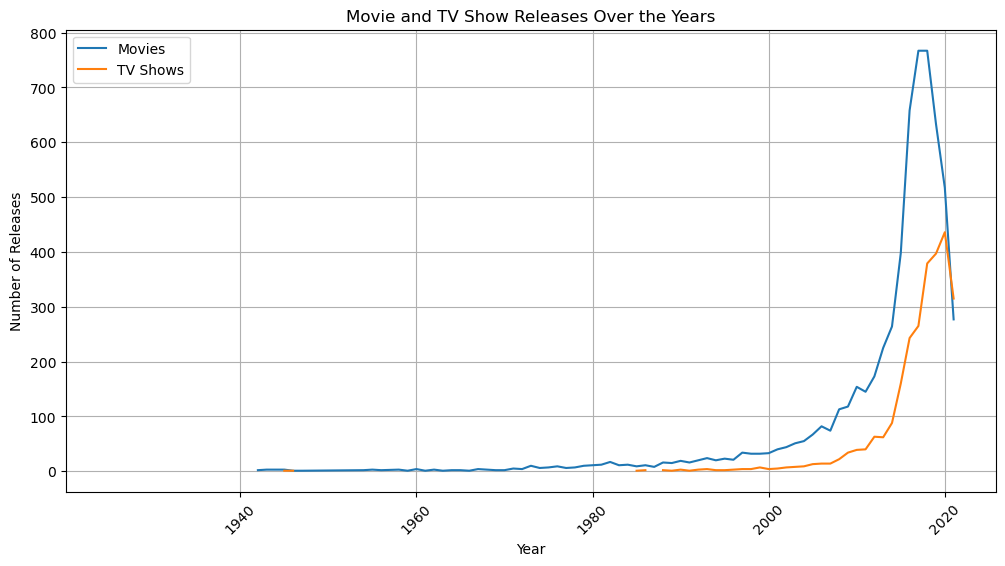

In [19]:
# Group the data by release year and type (Movie or TV Show) and count the number of releases
yearly_counts = data.groupby(['release_year', 'type']).size().unstack()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts['Movie'], label='Movies')
plt.plot(yearly_counts.index, yearly_counts['TV Show'], label='TV Shows')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Movie and TV Show Releases Over the Years')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

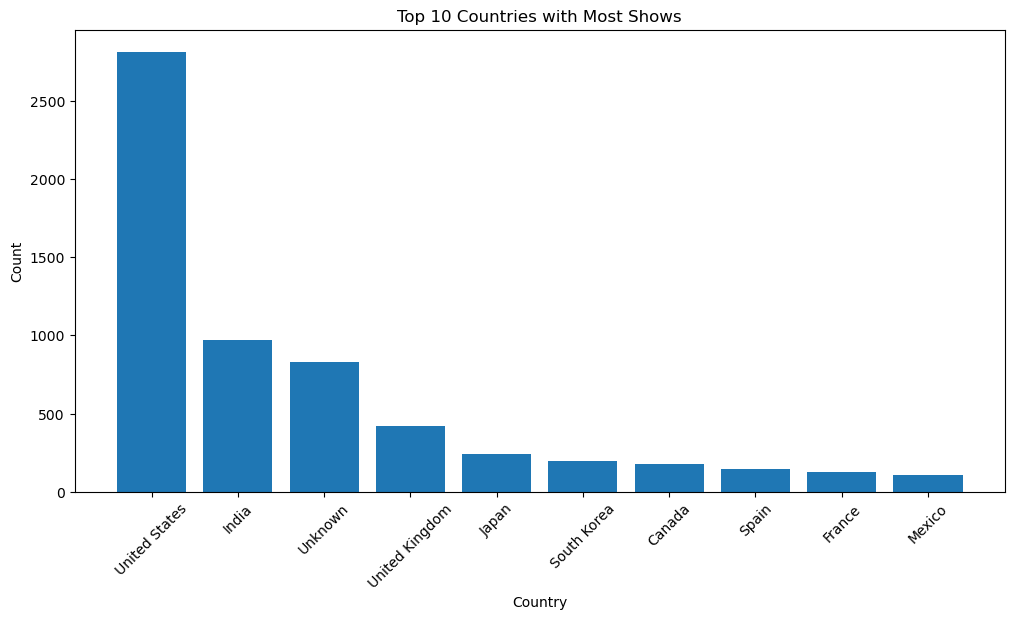

In [20]:
# Count the number of shows for each country
country_counts = data['country'].value_counts().head(10)  # Selecting top 10 countries

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most Shows')
plt.xticks(rotation=45)
plt.show()

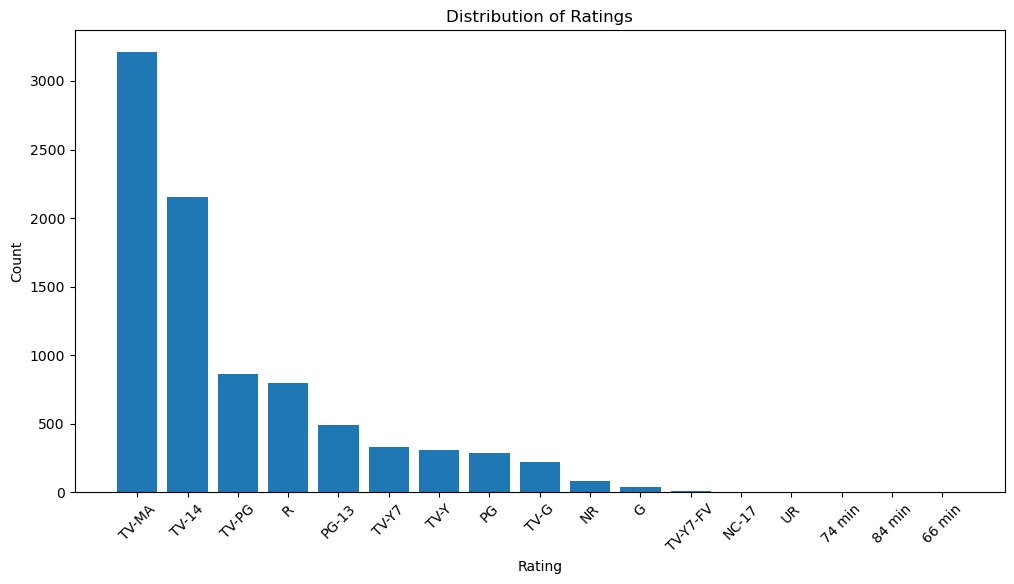

In [21]:
# Count the frequency of each rating
rating_counts = data['rating'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

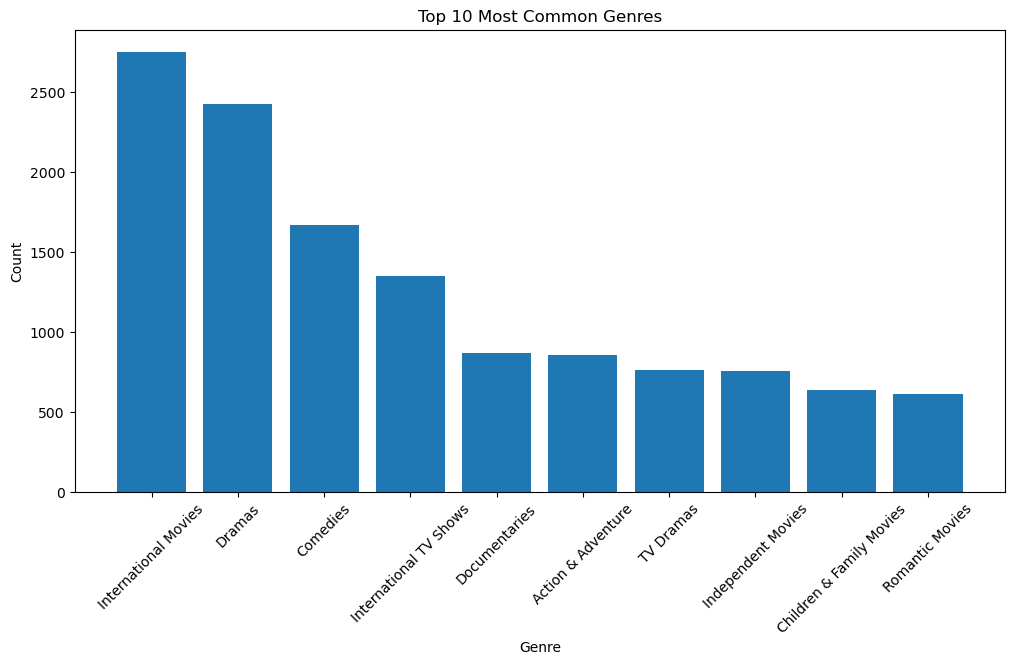

In [22]:
# Split the "listed_in" column into individual genres
genres = data['listed_in'].str.split(', ')

# Create a list to store all genres
all_genres = []

# Iterate over each row of genres and add them to the list
for genre_list in genres:
    all_genres.extend(genre_list)

# Count the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts().head(10)  # Selecting top 10 genres

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Common Genres')
plt.xticks(rotation=45)
plt.show()

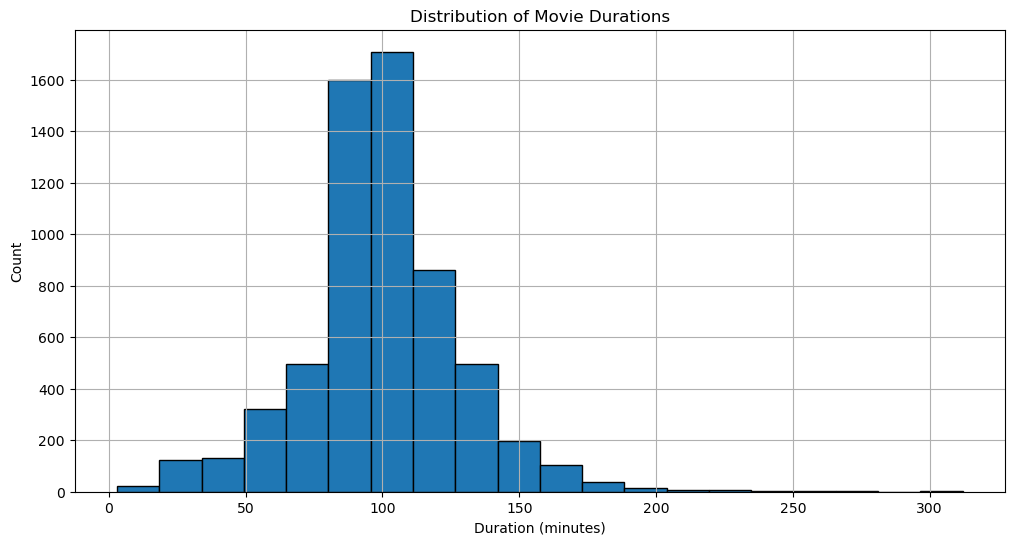

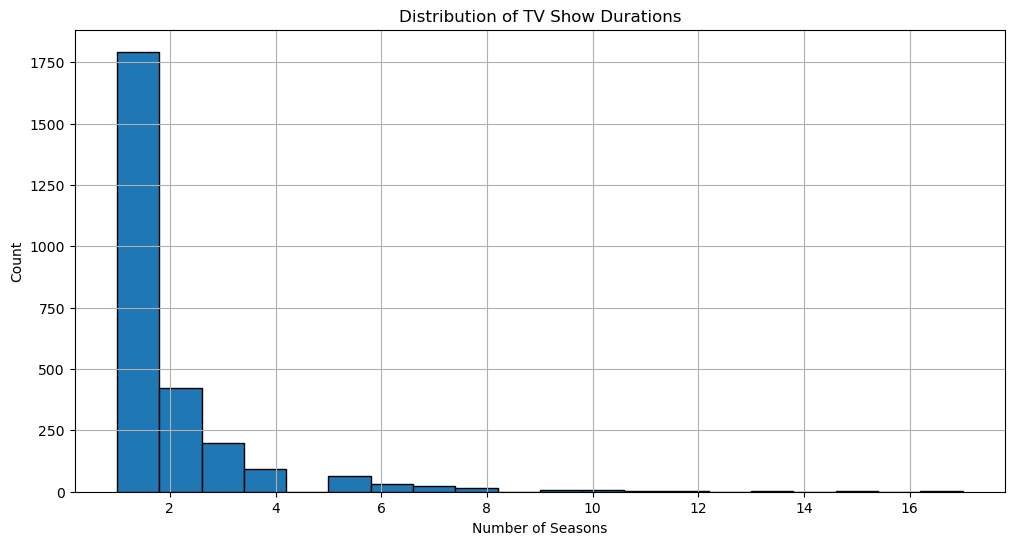

In [23]:
# Extract the numeric part of the duration column
data['duration'] = data['duration'].str.extract('(\d+)').astype(float)

# Create separate dataframes for movies and TV shows
movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']

# Plot histogram for movies
plt.figure(figsize=(12, 6))
plt.hist(movies['duration'], bins=20, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.grid(True)
plt.show()

# Plot histogram for TV shows
plt.figure(figsize=(12, 6))
plt.hist(tv_shows['duration'], bins=20, edgecolor='black')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.title('Distribution of TV Show Durations')
plt.grid(True)
plt.show()


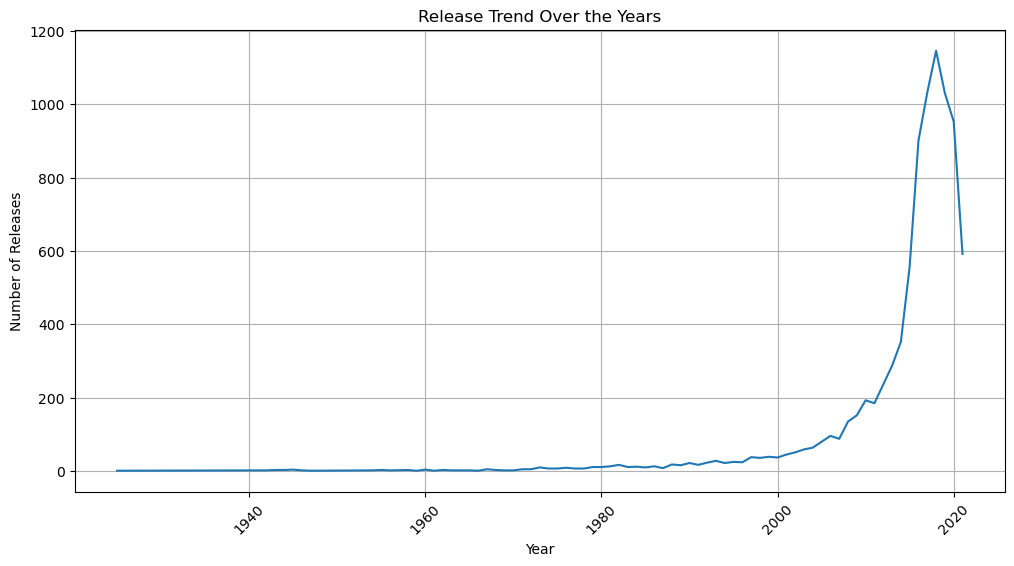

In [24]:
# Group the data by release year and count the number of releases
release_counts = data['release_year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(release_counts.index, release_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Release Trend Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [25]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
director_avg_ratings = data.groupby('director')['rating'].mean().sort_values(ascending=False).head(10)
print(director_avg_ratings)

director
A. L. Vijay                      NaN
A. Raajdheep                     NaN
A. Salaam                        NaN
A.R. Murugadoss                  NaN
Aadish Keluskar                  NaN
Aamir Bashir                     NaN
Aamir Khan                       NaN
Aanand Rai                       NaN
Aaron Burns                      NaN
Aaron Hancox, Michael McNamara   NaN
Name: rating, dtype: float64


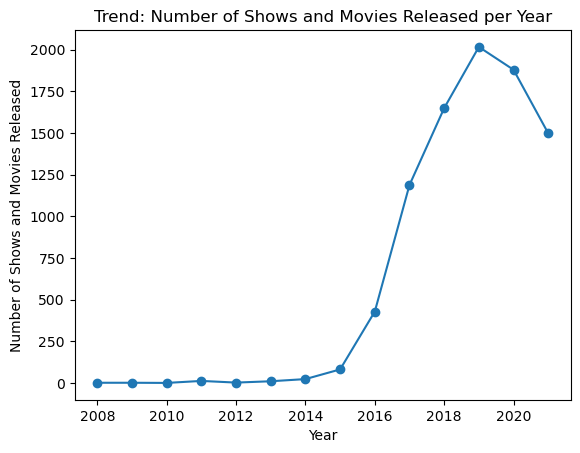

In [26]:
data['release_year'] = pd.to_datetime(data['date_added']).dt.year
counts = data['release_year'].value_counts().sort_index()
plt.plot(counts.index, counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Shows and Movies Released')
plt.title('Trend: Number of Shows and Movies Released per Year')
plt.show()